In [427]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

# Set the visual style for all plots
sns.set_theme(style="whitegrid")

In [428]:
url = 'https://en.wikipedia.org/wiki/List_of_largest_companies_in_the_United_States_by_revenue'
headers = {"User-Agent": "Mozilla/5.0"} 

response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, 'html.parser')

# Targeted the first table with class 'wikitable'
table = soup.find_all('table', class_='wikitable')[0]
world_titles = table.find_all('th')
column_titles = [title.text.strip() for title in world_titles]

df = pd.DataFrame(columns=column_titles)

# Extracting rows from the table body
column_data = table.find_all('tr')
for row in column_data[1:]:
    row_data = row.find_all('td')
    individual_row_data = [data.text.strip() for data in row_data]
    
    length = len(df)
    df.loc[length] = individual_row_data

df.head()

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,"680,985",5.1%,"2,100,000","Bentonville, Arkansas"
1,2,Amazon,Retail and cloud computing,"637,959",11.0%,"1,556,000","Seattle, Washington"
2,3,UnitedHealth Group,Healthcare,"400,278",7.7%,"400,000","Minnetonka, Minnesota"
3,4,Apple,Technology,"391,035",2.0%,"164,000","Cupertino, California"
4,5,CVS Health,Healthcare,"372,809",4.2%,"259,500","Woonsocket, Rhode Island"


In [429]:
# Function to remove Wikipedia footnotes (e.g., [1], [a])
def clean_footnotes(text):
    return re.sub(r'\[.*?\]', '', str(text))

# Apply cleaning to all columns
for col in df.columns:
    df[col] = df[col].apply(clean_footnotes)

# Convert string columns to numeric for calculation
df['Revenue (USD millions)'] = df['Revenue (USD millions)'].str.replace(',', '', regex=True).astype(float)
df['Revenue growth'] = df['Revenue growth'].str.replace('%', '', regex=True).astype(float)
df['Employees'] = df['Employees'].str.replace(',', '', regex=True).astype(float)

# Extract State from Headquarters for geographic analysis
df['State'] = df['Headquarters'].str.split(',').str[-1].str.strip()

print("Data Types after cleaning:")
print(df.dtypes)

Data Types after cleaning:
Rank                       object
Name                       object
Industry                   object
Revenue (USD millions)    float64
Revenue growth            float64
Employees                 float64
Headquarters               object
State                      object
dtype: object


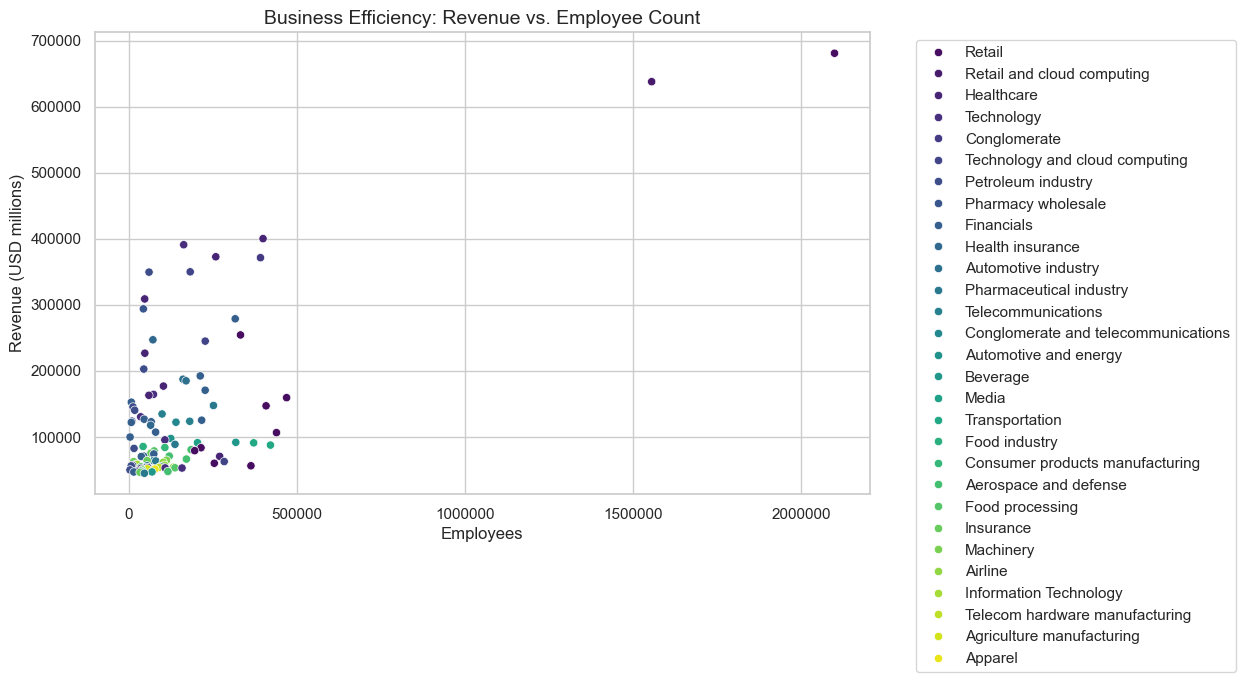

In [430]:
plt.figure(figsize=(10, 6))
plot = sns.scatterplot(
    data=df, 
    x='Employees', 
    y='Revenue (USD millions)', 
    hue='Industry', 
    palette='viridis'
)

plt.title('Business Efficiency: Revenue vs. Employee Count', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Saving the image for the GitHub README
plt.savefig('images/efficiency_scatter.png', bbox_inches='tight')
plt.show()

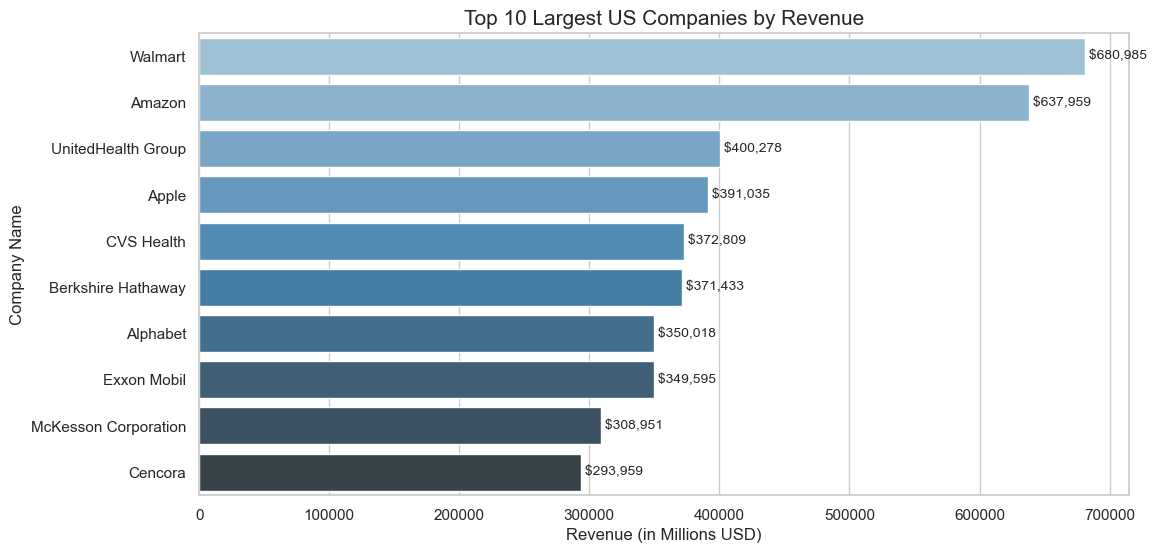

In [431]:
# Select the top 10 companies
top_10_revenue = df.nlargest(10, 'Revenue (USD millions)')

plt.figure(figsize=(12, 6))

# Create the bar chart
# We use 'Name' for the y-axis to create a horizontal bar chart (easier to read)
sns.barplot(
    data=top_10_revenue, 
    x='Revenue (USD millions)', 
    y='Name', 
    hue='Name',
    palette='Blues_d',
    legend=False
)

plt.title('Top 10 Largest US Companies by Revenue', fontsize=15)
plt.xlabel('Revenue (in Millions USD)')
plt.ylabel('Company Name')

# Add the actual values at the end of each bar for clarity
for index, value in enumerate(top_10_revenue['Revenue (USD millions)']):
    plt.text(value, index, f' ${value:,.0f}', va='center', fontsize=10)

plt.savefig('images/top_10_revenue.png', bbox_inches='tight')
plt.show()

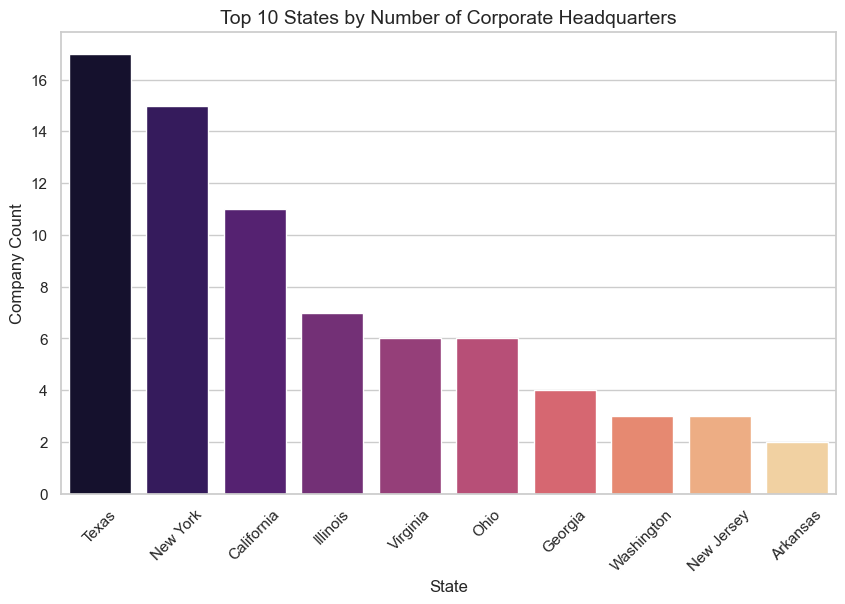

In [432]:
plt.figure(figsize=(10, 6))
state_counts = df['State'].value_counts().nlargest(10)

sns.barplot(
    x=state_counts.index, 
    y=state_counts.values, 
    hue=state_counts.index, 
    palette='magma', 
    legend=False
)

plt.title('Top 10 States by Number of Corporate Headquarters', fontsize=14)
plt.ylabel('Company Count')
plt.xticks(rotation=45)

plt.savefig('images/state_distribution.png', bbox_inches='tight')
plt.show()